In [1]:
%load_ext autoreload
%autoreload 2

In [88]:
from gw_distance_matrix import *
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng(seed=0)

root_path = Path("../..")
data_path = root_path / "data"

In [52]:
points, properties = pickle.load(open(data_path / "halos.pkl", 'rb'))

In [65]:
subsample = 200

def process_points(points):
    points -= points.mean(axis=0, keepdims=True)
    points /= points.std(axis=0, keepdims=True)
    return points

points_a = process_points(points[0]["Coordinates"])
points_b = process_points(points[1]["Coordinates"])





In [66]:
indices_a = rng.choice(points_a.shape[0], subsample, replace=False)
indices_b = rng.choice(points_b.shape[0], subsample, replace=False)

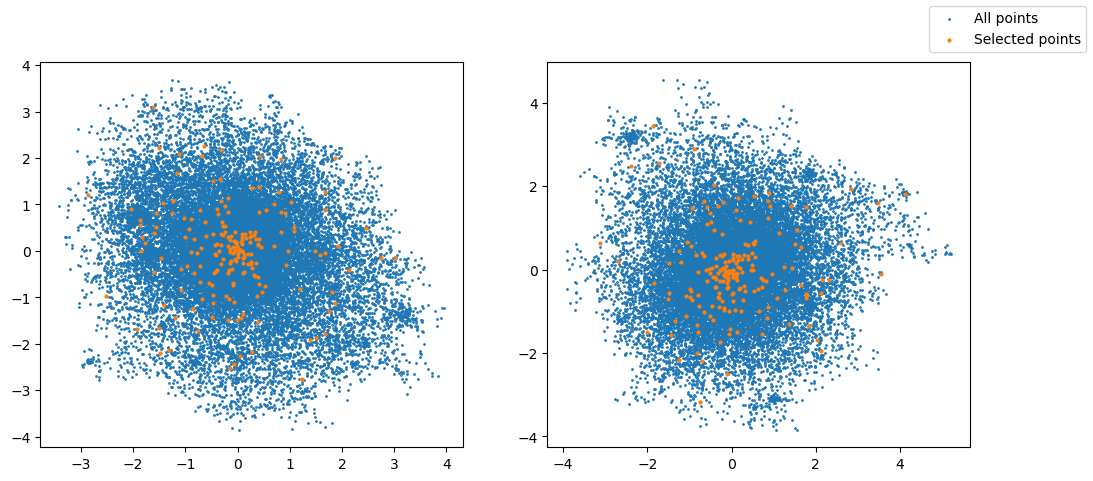

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(points_a[:, 0], points_a[:, 1], s=1, label="All points")
axs[0].scatter(points_a[indices_a, 0], points_a[indices_a, 1], s=4, label="Selected points")

axs[1].scatter(points_b[:, 0], points_b[:, 1], s=1)
axs[1].scatter(points_b[indices_b, 0], points_b[indices_b, 1], s=4)

fig.legend()

In [103]:
pointcloud_a = pointcloud.PointCloud(points_a[indices_a])
pointcloud_b = pointcloud.PointCloud(points_b[indices_b])

prob = quadratic_problem.QuadraticProblem(pointcloud_a, pointcloud_b)
# solver = gromov_wasserstein.GromovWasserstein(epsilon=0.4)
solver = lower_bound.LowerBoundSolver(epsilon=1e-2)

soln = solver(prob, max_iterations=10000)

In [107]:
prob.loss(soln.matrix)

TypeError: 'GWLoss' object is not callable

Converged: False


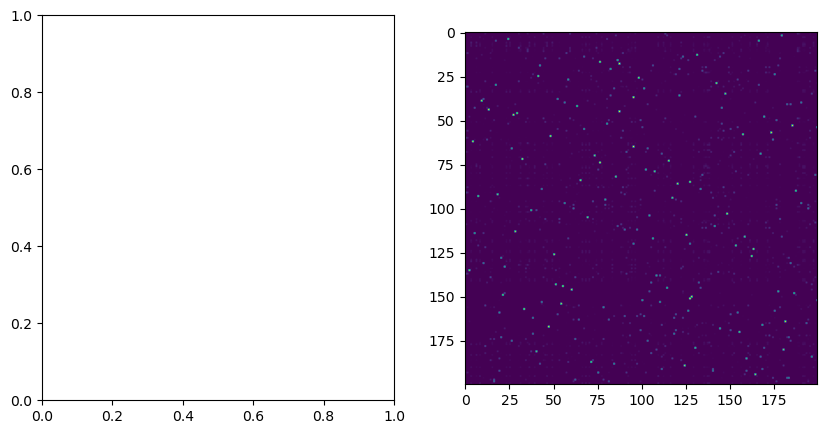

In [104]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# axs[0].plot(soln.costs[soln.costs != -1])
axs[1].imshow(soln.matrix)
print(f"Converged: {soln.converged}")

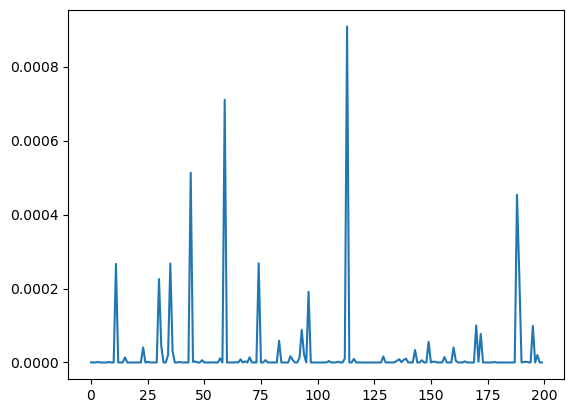

In [105]:
plt.plot(soln.matrix[1])